### Ομάδα 70: 
#### Χρήστος Παπαδημητρίου, el18017
#### Βαρθολομαίος Βαμβακάρης, el18072
#### Ζαχαρίας-Παύλος Αναστασιάδης, el18161

# Dataset : Connectionist Bench (Sonar, Mimes vs. Rocks)

In [1]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install --upgrade matplotlib # Κάνουμε update την matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Εισαγωγή & Επισκόπηση

In [2]:
import pandas as pd

df = pd.read_csv('sonar.all-data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
# check if we have any missing values

isNullArray, nullValsPresent = df.isnull(), False

for numCol in isNullArray:
    if True in isNullArray[numCol]:
        print("Missing Values in column: " + str(col))
        flag = True

if not nullValsPresent:
    print("There are no missing data in the Dataset")

There are no missing data in the Dataset


#### Σύντομη Παρουσίαση του Dataset
Το παραπάνω Dataset περιλαμβάνει 208 δείγματα που αντιστοιχούν σε patterns συχνοτήτων. Αυτά τα patterns έχουν προκύψει από την αντανάκλαση σημάτων Sonar σε μεταλλικούς κυλίνδρους και σε πετρώματα. Συγκεκριμένα τα σήματα Sonar που χρησιμοποιήθηκαν είναι "Chirps" αυξανόμενης συχνότητας. Το Dataset περιλαμβάνει αποτελέσματα εκπομπής Sonar από ποικίλες γωνίες (aspect angles), μεχρί 90$^{o}$ για τους μεταλλικούς κυλίνδρους και μέχρι 180$^{o}$ για τα πετρώματα. 

Κάθε pattern περιγράφεται από 60 αριθμούς μεταξύ 0.0 και 1.0. Καθένας από αυτούς τους αριθμούς αντιστοιχεί στο ολοκλήρωμα της ενέργειας μιας συγκεκριμένης μπάντας συχνοτήτων για μια περίοδο στον χρόνο. 

Τα labels που συναντάμε στο dataset είναι 'R' για τα πετρώματα (Rocks) και 'Μ' για τους μεταλλικούς κυλίνδρους (Metal cylinder). 

Σημειώνεται ότι **δεν** χρειάστηκε να γίνουν μετατροπές στο αρχείο 'sonar.all-data' πριν την εισαγωγή του στο Notebook

#### Ακολουθούν κάποιες επιπλέον πληροφορίες για το Dataset:
* Το Dataset περιλαμβάνει 208 δείγματα. Κάθε δείγμα έχει 60 χαρακτηριστηκά. Το καθένα από αυτά είναι μία τιμή μεταξύ 0.0 και 1.1 (Το ολοκλήρωμα της ενέργειας που αναφέραμε παραπάνω) 
* Δεν υπάρχουν επικεφαλίδες, ούτε αρίθμηση γραμμών
* Οι ετικέτες των κλάσεων παίρνουν τιμές 'R' και 'Μ', όπως αναφέραμε παραπάνω. Βρίσκονται στην 61$^{η}$ κολόνα (index 60).
* Δεν υπάρχουν δείγματα με απουσιάζουσες τιμές
* Η κλαση R έχει 97 δείγματα (ποσοστό: 46.6%), ενώ η κλάση M έχει 111 δείγματα (ποσοστό: 53.4%). Σύμφωνα με το όριο 60%-40% πρόκειται για ισορροπημένο Dataset.

## Προετοιμασία

In [4]:
# split the dataframe into features matrix and labels column
features_df, labels_df = df.iloc[:,0:60], df.iloc[:,[60]]
print(labels_df.shape)
print(features_df.shape)

(208, 1)
(208, 60)


In [5]:
# turn features into a numpy array
features_np = features_df.values
features_np

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [6]:
# replace (R,M) with (0,1) in labels 

labels_df = labels_df.replace({'R':0}).replace({'M':1})
labels_np = labels_df.values.flatten()
labels_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
from sklearn.model_selection import train_test_split

# split our data into training and testing data
train, test, train_labels, test_labels = train_test_split(features_np, labels_np, test_size=0.30)

## Ταξινόμηση

In [8]:
# import all classifiers 
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

### Επίδοση Out-Of-the-Box

In [9]:
# Dummy Classifier

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

accuracy_scores_ootb = dict()
f1_scores_ootb = dict()
dummy_classifiers = [(dc_uniform, 'dc uniform'), (dc_constant_0, 'dc constant 0'),\
                       (dc_constant_1, 'dc constant 1'), (dc_most_frequent, 'dc most frequent'),\
                       (dc_stratified, 'dc stratified')]

for (classifier, name) in dummy_classifiers:
    # train 
    model = classifier.fit(train, train_labels)
    # predict for test data
    preds = classifier.predict(test)
    # calculate accuracy
    accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
    # calculate f1 scores
    f1_scores_ootb[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)

In [10]:
# Gaussian Naive Bayes Classifier

name = 'gnb'
gnb = GaussianNB()
#train
model = gnb.fit(train, train_labels)
# predict for test data
preds = gnb.predict(test)
# calculate accuracy
accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
# calculate f1 scores
f1_scores_ootb[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)

In [11]:
# K-Nearest-Neighbours

name = 'knn'
knn = KNeighborsClassifier()
# train
knn.fit(train, train_labels)
# predict for test data
preds = knn.predict(test)
# calculate accuracy
accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
# calculate f1 scores
f1_scores_ootb[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)

In [12]:
name = 'logisticRegression'
logReg = LogisticRegression()

# train
logReg.fit(train, train_labels)
# predict for test data
preds = logReg.predict(test)
# calculate accuracy
accuracy_scores_ootb[name] = round(accuracy_score(test_labels, preds),3)
# calculate f1 scores
f1_scores_ootb[name] = round(precision_recall_fscore_support(test_labels, preds, average='macro', zero_division=1)[2],3)

**Παρουσίαση Επίδοσης Out-of-the-Box:**

In [13]:
# print results
for name in accuracy_scores_ootb.keys():
    print("Classifier: " + name + "->accuracy: " + str(accuracy_scores_ootb[name]) + \
         ", f1-score: " + str(f1_scores_ootb[name]))
    print()    

Classifier: dc uniform->accuracy: 0.619, f1-score: 0.614

Classifier: dc constant 0->accuracy: 0.476, f1-score: 0.323

Classifier: dc constant 1->accuracy: 0.524, f1-score: 0.344

Classifier: dc most frequent->accuracy: 0.524, f1-score: 0.344

Classifier: dc stratified->accuracy: 0.508, f1-score: 0.507

Classifier: gnb->accuracy: 0.698, f1-score: 0.698

Classifier: knn->accuracy: 0.794, f1-score: 0.786

Classifier: logisticRegression->accuracy: 0.746, f1-score: 0.738



| Classifier | Accuracy | F1-score |
| :-: | :-: | :-: |
| Dummy-Uniform | 0.42857142857142855 | 0.4284274193548387 |
| Dummy-Constant-0 | 0.47619047619047616 | 0.3225806451612903 |
| Dummy-Constant-1 | 0.5238095238095238 | 0.34375000000000006 |
| Dummy-Most-Frequent | 0.5238095238095238 | 0.34375000000000006 |
| Dummy-Stratified | 0.47619047619047616 | 0.471395881006865 |
| Gaussian Naive Bayes | 0.6984126984126984 | 0.6971920060713381 |
| K-Nearest-Neighbours | 0.8095238095238095 | 0.8055555555555555 

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# functions to plot bar charts

def plotBarChart(x, ylist, cols, labs, tit, xlab, ylab):
    plt.clf()
    xaxis = np.arange(len(x))

    # offsets of bar plots
    totalWidth = len(ylist)*0.2-0.2
    offset = [-(totalWidth/2)+i*0.2 for i in range(len(ylist))]
    fig, ax = plt.subplots(figsize=(15,8))
    
    for i in range(len(ylist)):
        fig = plt.bar(xaxis+offset[i], ylist[i], color=cols[i], label=labs[i], width=0.2)

    # correct the xticklabels
    ax.set_xticks(xaxis)
    ax.set_xticklabels(x)
    
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(tit)
    
def plotBarChartDoubleAxes(x,ylist,cols,labs,tit,xlab,ylabList):
    xaxis = np.arange(len(x))
    
    # offsets of bar plots
    totalWidth = len(ylist)*0.2-0.2
    offset = [-(totalWidth/2)+i*0.2 for i in range(len(ylist))]
    
    
    fig, ax0 = plt.subplots(figsize=(15,9))
    # create second set of axes with same x axis
    ax1 = ax0.twinx()
    
    ax0.set_yticks([i/10 for i in range(11)])
    # plot       
    ax0.bar(xaxis+offset[0], ylist[0], color=cols[0], label=labs[0], width=0.2)
    ax1.bar(xaxis+offset[1], ylist[1], color=cols[1], label=labs[1], width=0.2)
    
    # ylabels
    ax0.set_ylabel(ylabList[0])
    ax1.set_ylabel(ylabList[1])
    
    # correct the xticklabels
    ax0.set_xticks(xaxis)
    ax0.set_xticklabels(x)
    
    
    ax0.legend(loc='upper right', bbox_to_anchor=(0.95,0.99))
    ax1.legend(loc='upper right', bbox_to_anchor=(0.95,0.94))
    ax0.set_xlabel(xlab)
    plt.title(tit)   

<Figure size 432x288 with 0 Axes>

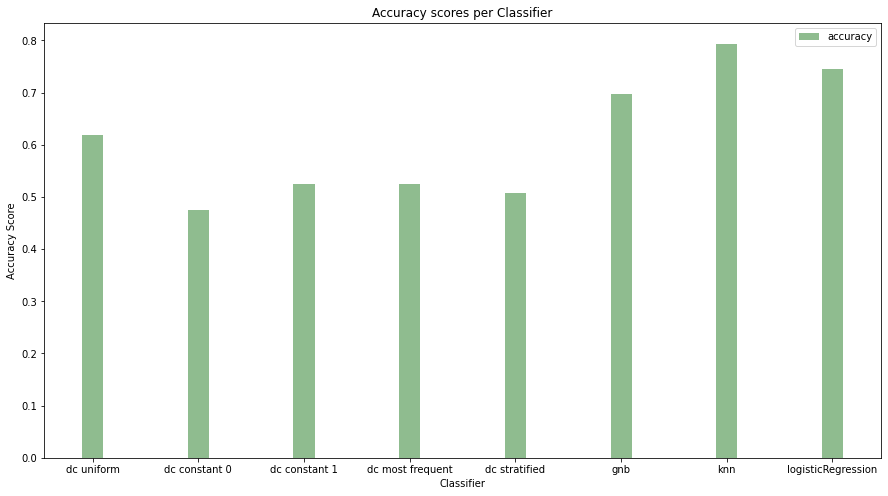

In [15]:
xaxis, yaxis = [], []
for (key, val) in accuracy_scores_ootb.items():
    xaxis.append(key)
    yaxis.append(val)

plotBarChart(xaxis, [yaxis], ['darkseagreen'], ['accuracy'],\
             'Accuracy scores per Classifier', 'Classifier', 'Accuracy Score')

<Figure size 432x288 with 0 Axes>

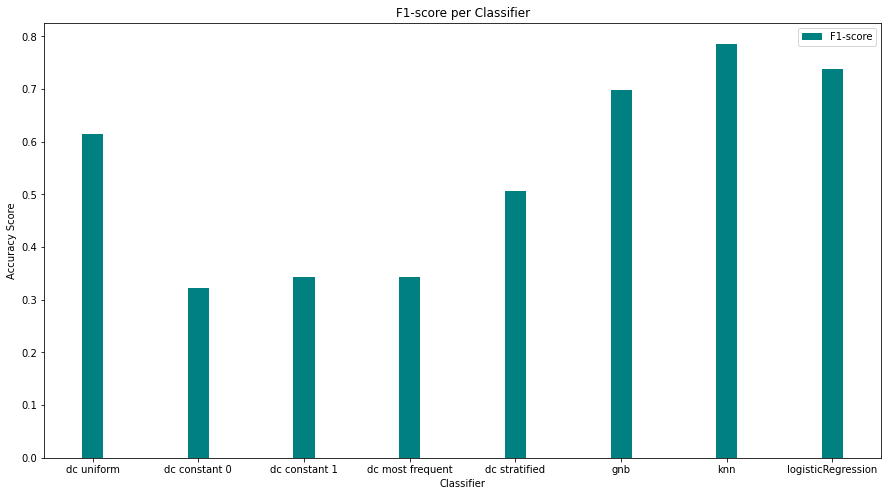

In [16]:
xaxis, yaxis = [], []
for (key, val) in f1_scores_ootb.items():
    xaxis.append(key)
    yaxis.append(val)

plotBarChart(xaxis, [yaxis], ['teal'], ['F1-score'],\
             'F1-score per Classifier', 'Classifier', 'Accuracy Score')

### Βελτιστοποίηση

In [17]:
!pip install --upgrade imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [18]:
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [19]:
train_variance = train.var(axis=0)
print(train_variance)
# print(np.max(train_variance))

# maximum variance
max_variance = np.max(train_variance)
max_variance

[5.29245782e-04 1.20451979e-03 1.47142191e-03 2.25954580e-03
 2.98353276e-03 3.53609965e-03 3.27433265e-03 6.20882403e-03
 1.19134054e-02 1.45768356e-02 1.52759528e-02 1.99447441e-02
 2.02036642e-02 2.67835632e-02 4.15302040e-02 5.52414143e-02
 6.90611874e-02 6.84352674e-02 6.54221030e-02 6.62993849e-02
 6.84695870e-02 6.60959855e-02 6.15520632e-02 5.62467344e-02
 5.81395367e-02 6.00943635e-02 6.21122158e-02 5.57865197e-02
 5.80018634e-02 5.05860963e-02 4.77315016e-02 4.49811040e-02
 4.31558101e-02 5.18088471e-02 6.71173234e-02 6.88791245e-02
 5.48005891e-02 4.25612922e-02 3.66640379e-02 3.04112137e-02
 2.83391481e-02 2.75094382e-02 1.83917727e-02 1.62753052e-02
 2.24854436e-02 1.81952076e-02 7.51661299e-03 3.61956257e-03
 1.27506448e-03 2.12467380e-04 1.57974418e-04 9.70118782e-05
 4.92837356e-05 5.38104352e-05 5.44713788e-05 3.26663610e-05
 3.20045422e-05 3.99332442e-05 3.84961826e-05 2.73194559e-05]


0.06906118743210463

**Εύρεση Βέλτιστων Υπερπαραμέτρων**
**(Διασταυρούμενη Επικύρωση σε Αναζήτηση Πλέγματος)**

In [20]:
accuracy_scores_best = dict()
f1_scores_best = dict()
accuracy_test_time = dict()
accuracy_train_time = dict()
f1_test_time = dict()
f1_train_time = dict()

#### *Dummy*

In [21]:
# selector = VarianceThreshold()
# # scaler = StandardScaler()
# scaler = preprocessing.MinMaxScaler()
# ros = RandomOverSampler()
# pca = PCA()
# clf = DummyClassifier(strategy='uniform') 
# pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('dummy', clf)])

In [22]:
# # variance thresholds
# vthresholds = [0, max_variance/110000, max_variance/101000, max_variance/100100, max_variance/100000, max_variance/(100000-100),max_variance/(100000-1000),max_variance/(100000-10000) ]
# # vthresholds = [max_variance/num for num in range(100000+10000, 100000-10000, -100)]
# vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000]

# # print(len(vthresholds))

# # number of components for pca 
# n_components = [7,8,9,10,11,12]

In [23]:
# estimator = GridSearchCV(pipe, dict(selector__threshold=vthresholds, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)

In [24]:
# import time
# start_time = time.time()
# estimator.fit(train, train_labels)
# preds = estimator.predict(test)
# print("Total time to fit & predict: %s seconds" % (time.time() - start_time))
# print(classification_report(test_labels, preds))

In [25]:
# print(estimator.best_estimator_)
# print(estimator.best_params_)

#### *Gaussian Naive Bayes*

In [26]:
# create pipeline to perform preprocessing and fitting
selector = VarianceThreshold()
scaler = StandardScaler()
# scaler = preprocessing.MinMaxScaler()
ros = RandomOverSampler()
pca = PCA()
clf = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', clf)])

In [27]:
# parameters for the grid

# variance thresholds
# vthresholds = [0, max_variance/110000, max_variance/101000, max_variance/100100, max_variance/100000, max_variance/(100000-100),max_variance/(100000-1000),max_variance/(100000-10000) ]
vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000,max_variance/100]

# number of components for pca 
n_components = [8,9,10,11,12,13,17,20]
smoothing = np.logspace(0,-9, num=10)

In [28]:
estimator_f1_score = GridSearchCV(pipe,
                         dict(selector__threshold=vthresholds,
                              pca__n_components=n_components,
                              gnb__var_smoothing = smoothing
                             ),
                         cv=10,
                         scoring='f1_macro',
                         n_jobs=-1)

In [29]:
# find best parameters according to f1-score metric

estimator_f1_score.fit(train, train_labels)
preds = estimator_f1_score.predict(test)
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.78      0.85      0.81        33

    accuracy                           0.79        63
   macro avg       0.80      0.79      0.79        63
weighted avg       0.80      0.79      0.79        63



In [30]:
# print(estimator_f1_score.best_estimator_)
# print(estimator_f1_score.best_params_)
print('Best f1-score: %s' % estimator_f1_score.best_score_)
f1_scores_best['gnb'] = estimator_f1_score.best_score_

Best f1-score: 0.8185207929325576


In [31]:
import time

# train and test the best model again, to calculate the requested times
gnb_f1_best = estimator_f1_score.best_estimator_

# find training time
start_time = time.time()
gnb_f1_best.fit(train, train_labels)
f1_train_time['gnb'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = gnb_f1_best.predict(test)
f1_test_time['gnb'] = (time.time()-start_time)

In [32]:
estimator_accuracy = GridSearchCV(pipe,
                         dict(selector__threshold=vthresholds,
                              pca__n_components=n_components,
                              gnb__var_smoothing = smoothing
                             ),
                         cv=10,
                         scoring='accuracy',
                         n_jobs=-1)

In [33]:
# find best parameters according to accuracy metric

estimator_accuracy.fit(train, train_labels)
preds = estimator_accuracy.predict(test)
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        30
           1       0.80      0.73      0.76        33

    accuracy                           0.76        63
   macro avg       0.76      0.76      0.76        63
weighted avg       0.77      0.76      0.76        63



In [34]:
# print(estimator_accuracy.best_estimator_)
# print(estimator_accuracy.best_params_)
print('Best accuracy: %s' % estimator_accuracy.best_score_)
accuracy_scores_best['gnb'] = estimator_accuracy.best_score_

Best accuracy: 0.8080952380952381


In [35]:
import time
train_time = dict()
test_time = dict()

# train and test the best model again, to calculate the requested times
gnb_accuracy_best = estimator_accuracy.best_estimator_

# find training time
start_time = time.time()
gnb_accuracy_best.fit(train, train_labels)
accuracy_train_time['gnb'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = gnb_accuracy_best.predict(test)
accuracy_test_time['gnb'] = (time.time()-start_time)

##### *K-Nearest-Neighbours*

In [36]:
selector = VarianceThreshold()
scaler = StandardScaler()
# min_max_scaler = preprocessing.MinMaxScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
# pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)])

In [37]:
# variance thresholds
vthresholds = [0, max_variance/110000, max_variance/101000, max_variance/100100, max_variance/100000, max_variance/(100000-100),max_variance/(100000-1000),max_variance/(100000-10000) ]
# vthresholds = [max_variance/num for num in range(100000+10000, 100000-10000, -100)]
vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000, max_variance/100]

# number of components for pca 
n_components = [7,8,9,10,11,12]
# number of neighbours
k = [1,2,3,4,5]

In [38]:
estimator_f1_score = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components, 
                              kNN__n_neighbors=k
                             ), 
                         cv=10, 
                         scoring='f1_macro',
                         n_jobs=-1)

In [39]:
# find best parameters according to f1-score metric

estimator_f1_score.fit(train, train_labels)
preds = estimator_f1_score.predict(test)
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.91      0.94      0.93        33

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



In [40]:
# print(estimator_f1_score.best_estimator_)
# print(estimator_f1_score.best_params_)
print('Best f1-score: %s' % estimator_f1_score.best_score_)
f1_scores_best['knn'] = estimator_f1_score.best_score_

Best f1-score: 0.8932245124156889


In [41]:
import time

# train and test the best model again, to calculate the requested times
knn_f1_best = estimator_f1_score.best_estimator_

# find training time
start_time = time.time()
knn_f1_best.fit(train, train_labels)
f1_train_time['knn'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = knn_f1_best.predict(test)
f1_test_time['knn'] = (time.time()-start_time)

In [42]:
estimator_accuracy = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components, 
                              kNN__n_neighbors=k
                             ), 
                         cv=10, 
                         scoring='accuracy',
                         n_jobs=-1)

In [43]:
# find best parameters according to accuracy metric

estimator_accuracy.fit(train, train_labels)
preds = estimator_accuracy.predict(test)
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.91      0.94      0.93        33

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



In [44]:
# print(estimator_accuracy.best_estimator_)
# print(estimator_accuracy.best_params_)
print('Best accuracy: %s' % estimator_accuracy.best_score_)
accuracy_scores_best['knn'] = estimator_accuracy.best_score_

Best accuracy: 0.8947619047619048


In [45]:
import time

# train and test the best model again, to calculate the requested times
knn_accuracy_best = estimator_accuracy.best_estimator_

# find training time
start_time = time.time()
knn_accuracy_best.fit(train, train_labels)
accuracy_train_time['knn'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = knn_accuracy_best.predict(test)
accuracy_test_time['knn'] = (time.time()-start_time)

##### *Logistic Regression*

In [46]:
selector = VarianceThreshold()
scaler = StandardScaler()
# scaler = preprocessing.MinMaxScaler()
ros = RandomOverSampler()
pca = PCA()
clf = LogisticRegression()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca),\
                       ('logReg', clf)])

# variance thresholds
# vthresholds = [0, max_variance/110000, max_variance/101000, max_variance/100100, max_variance/100000, max_variance/(100000-100),max_variance/(100000-1000),max_variance/(100000-10000) ]
# vthresholds = [max_variance/num for num in range(100000+10000, 100000-10000, -100)]
vthresholds = [0, max_variance/1000000, max_variance/100000,max_variance/10000,max_variance/1000,max_variance/100]

# number of components for pca 
n_components = [7,8,9,10,11,12]

# logistic regression classifier parameters
# penalty = ['l1', 'l2', 'elasticnet', 'none']
C = np.logspace(-4, 4, num=10)

logReg_solver = ['lbfgs','newton-cg','liblinear','sag','saga']
# max_iter = [100, 1000, 2500, 5000]

In [47]:
estimator_f1_score = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components,
#                               logReg__penalty=penalty,
                              logReg__C=C,
                              logReg__solver=logReg_solver,
                             ),
                         cv=10, 
                         scoring='f1_macro', 
                         n_jobs=-1)

# find best parameters according to f1-score metric
estimator_f1_score.fit(train, train_labels)
preds = estimator_f1_score.predict(test)
print(classification_report(test_labels, preds))


# print(estimator_f1_score.best_estimator_)
# print(estimator_f1_score.best_params_)
print('Best f1-score: %s' % estimator_f1_score.best_score_)
f1_scores_best['logisticRegression'] = estimator_f1_score.best_score_

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.76      0.85      0.80        33

    accuracy                           0.78        63
   macro avg       0.78      0.77      0.78        63
weighted avg       0.78      0.78      0.78        63

Best f1-score: 0.8342011419952596


In [48]:
import time

# train and test the best model again, to calculate the requested times
logReg_f1_best = estimator_f1_score.best_estimator_

# find training time
start_time = time.time()
logReg_f1_best.fit(train, train_labels)
f1_train_time['logisticRegression'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = logReg_f1_best.predict(test)
f1_test_time['logisticRegression'] = (time.time()-start_time)

In [49]:
estimator_accuracy = GridSearchCV(pipe, 
                         dict(selector__threshold=vthresholds, 
                              pca__n_components=n_components,
#                               logReg__penalty=penalty,
                              logReg__C=C,
                              logReg__solver=logReg_solver,
                             ),
                         cv=10, 
                         scoring='f1_macro', 
                         n_jobs=-1)

# find best parameters according to accuracy metric

estimator_accuracy.fit(train, train_labels)
preds = estimator_accuracy.predict(test)
print(classification_report(test_labels, preds))

# print(estimator_accuracy.best_estimator_)
# print(estimator_accuracy.best_params_)
print('Best accuracy: %s' % estimator_accuracy.best_score_)
accuracy_scores_best['logisticRegression'] = estimator_accuracy.best_score_

              precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.71      0.82      0.76        33

    accuracy                           0.73        63
   macro avg       0.74      0.73      0.73        63
weighted avg       0.73      0.73      0.73        63

Best accuracy: 0.8404255548373196


In [64]:
import time

# train and test the best model again, to calculate the requested times
logReg_accuracy_best = estimator_accuracy.best_estimator_

# find training time
start_time = time.time()
logReg_accuracy_best.fit(train, train_labels)
accuracy_train_time['logisticRegression'] = (time.time()-start_time)

# find testing time
start_time = time.time()
preds = logReg_accuracy_best.predict(test)
accuracy_test_time['logisticRegression'] = (time.time()-start_time)

## Αποτελέσματα & Συμπεράσματα

Παρουσιάζουμε τις επιδόσεις των βέλτιστων ταξινομητών κάθε είδους. Η στήλη `Relative Accuracy` περιλαμβάνει τον λόγo του βέλτιστου Accuracy προς το out-of-the-box Accuracy. Το αντίστοιχο ισχύει για την στήλη `Relative F1-score`.

In [51]:
!pip install markdown

Defaulting to user installation because normal site-packages is not writeable


In [54]:
# calculate relative metrics
accuracy_scores_relative = dict()
f1_scores_relative = dict()

for name in accuracy_scores_best.keys():
    accuracy_scores_relative[name] = accuracy_scores_best[name]/accuracy_scores_ootb[name]
    f1_scores_relative[name] = f1_scores_best[name]/f1_scores_ootb[name]    

In [66]:
from IPython.display import display, Markdown, Latex
a = 1
display(Markdown("""
| Classifier | Accuracy | Relative Accuracy | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: |
| Gaussian Naive Bayes | """+str(accuracy_scores_best['gnb'])+""" | """+str(accuracy_scores_relative['gnb'])+""" | """+str(accuracy_train_time['gnb'])+""" | """+str(accuracy_test_time['gnb'])+""" |
| K-Nearest-Neighbours | """+str(accuracy_scores_best['knn'])+""" | """+str(accuracy_scores_relative['knn'])+""" | """+str(accuracy_train_time['knn'])+""" | """+str(accuracy_test_time['knn'])+""" |
| Logistic Regression  | """+str(accuracy_scores_best['logisticRegression'])+""" | """+str(accuracy_scores_relative['logisticRegression'])+""" | """+str(accuracy_train_time['logisticRegression'])+""" | """+str(accuracy_test_time['logisticRegression'])+""" |
"""))


| Classifier | Accuracy | Relative Accuracy | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: |
| Gaussian Naive Bayes | 0.8080952380952381 | 1.1577295674716879 | 0.014088630676269531 | 0.0018525123596191406 |
| K-Nearest-Neighbours | 0.8947619047619048 | 1.1269041621686458 | 0.02684330940246582 | 0.06217336654663086 |
| Logistic Regression  | 0.8404255548373196 | 1.1265758107738868 | 0.024271011352539062 | 0.0011706352233886719 |


In [67]:
from IPython.display import display, Markdown, Latex
a = 1
display(Markdown("""
| Classifier | F1-score | Relative F1-score | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: |
| Gaussian Naive Bayes | """+str(f1_scores_best['gnb'])+""" | """+str(f1_scores_relative['gnb'])+""" | """+str(f1_train_time['gnb'])+""" | """+str(f1_test_time['gnb'])+""" |
| K-Nearest-Neighbours | """+str(f1_scores_best['knn'])+""" | """+str(f1_scores_relative['knn'])+""" | """+str(f1_train_time['knn'])+""" | """+str(f1_test_time['knn'])+""" |
| Logistic Regression  | """+str(f1_scores_best['logisticRegression'])+""" | """+str(f1_scores_relative['logisticRegression'])+""" | """+str(f1_train_time['logisticRegression'])+""" | """+str(f1_test_time['logisticRegression'])+""" |
"""))


| Classifier | F1-score | Relative F1-score | Train Time (s) | Test Time (s) |
| :-: | :-: | :-: | :-: | :-: |
| Gaussian Naive Bayes | 0.8185207929325576 | 1.1726658924535212 | 0.02064824104309082 | 0.0014905929565429688 |
| K-Nearest-Neighbours | 0.8932245124156889 | 1.1364179547273394 | 0.013412952423095703 | 0.03380465507507324 |
| Logistic Regression  | 0.8342011419952596 | 1.1303538509420863 | 0.019457101821899414 | 0.0014126300811767578 |


In [56]:
# prapare to plot
names, f1_best_axis, accuracy_best_axis, f1_relative_axis, accuracy_relative_axis = [], [], [], [], []

for name in accuracy_scores_best.keys():
    names.append(name)
    f1_best_axis.append(f1_scores_best[name])
    accuracy_best_axis.append(accuracy_scores_best[name])
    f1_relative_axis.append(f1_scores_relative[name])
    accuracy_relative_axis.append(accuracy_scores_relative[name])
    

In [57]:
print(names)
print(f1_best_axis)
print(f1_relative_axis)

print(accuracy_best_axis)

['gnb', 'knn', 'logisticRegression']
[0.8185207929325576, 0.8932245124156889, 0.8342011419952596]
[1.1726658924535212, 1.1364179547273394, 1.1303538509420863]
[0.8080952380952381, 0.8947619047619048, 0.8404255548373196]


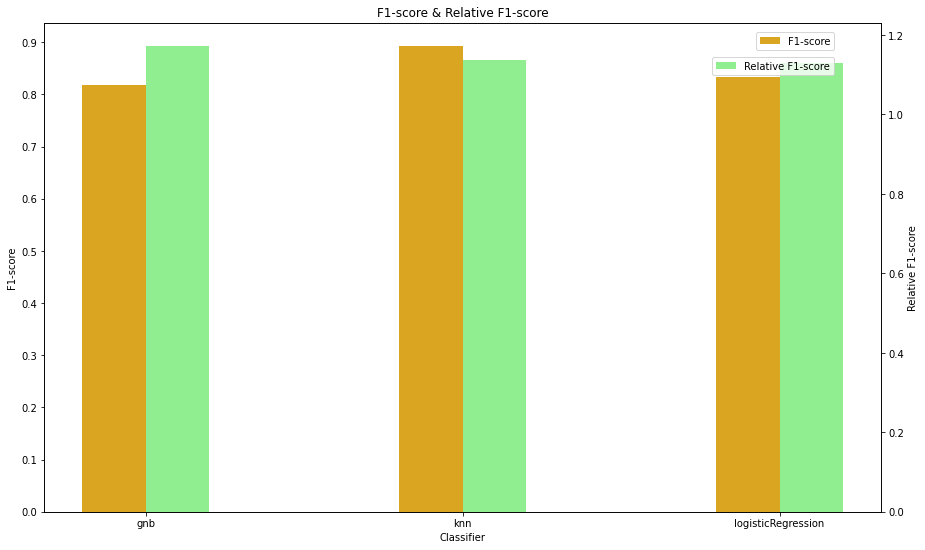

In [58]:
# plot f1 scores
plotBarChartDoubleAxes(names, [f1_best_axis, f1_relative_axis], ['goldenrod','lightgreen'],\
            ['F1-score','Relative F1-score'],\
             'F1-score & Relative F1-score', 'Classifier', ['F1-score','Relative F1-score'])

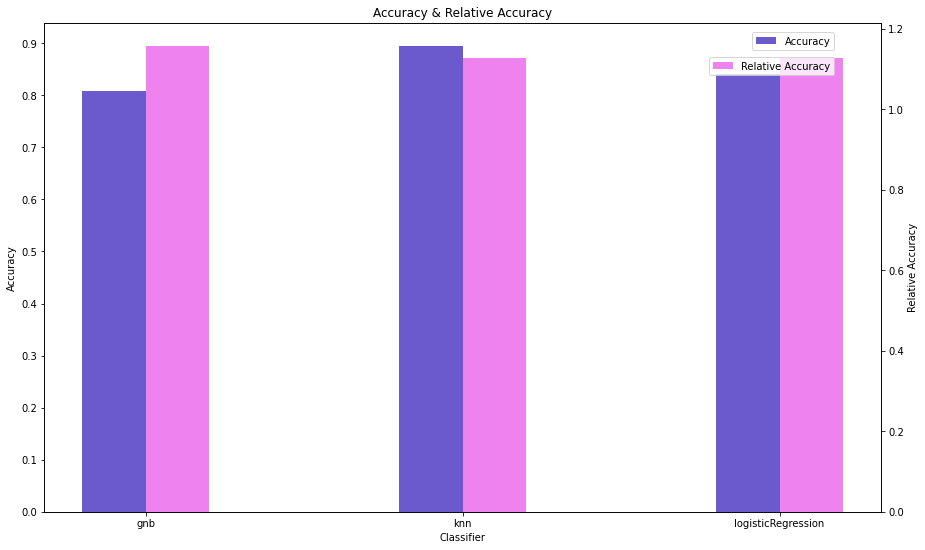

In [59]:
# plot accuracy
plotBarChartDoubleAxes(names, [accuracy_best_axis, accuracy_relative_axis], ['slateblue','violet'],\
            ['Accuracy','Relative Accuracy'],\
             'Accuracy & Relative Accuracy', 'Classifier', ['Accuracy','Relative Accuracy'])


AxesSubplot(0.125,0.125;0.62x0.755)


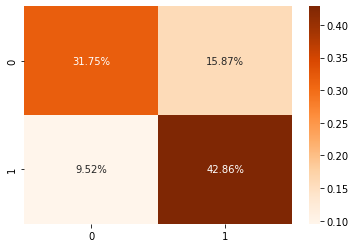

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrices
cnf_matrix = confusion_matrix(test_labels,preds)

# group_names = ['True Neg','False Pos','False Neg','True Pos']
# group_counts = [“{0:0.0f}”.format(value) for value in
#                 cnf_matrix.flatten()]
# group_percentages = [“{0:.2%}”.format(value) for value in
#                      cnf_matrix.flatten()/np.sum(cnf_matrix)]
# labels = [f”{v1}\n{v2}\n{v3}” for v1, v2, v3 in
#           zip(group_names,group_counts,group_percentages)]
# labels = np.asarray(labels).reshape(2,2)

print(sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%', cmap='Oranges'))